In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_percentage_error

import matplotlib.pyplot as plt

In [4]:
DATA_PATH = './LR_advertising.csv'

In [5]:
df = pd.read_csv(DATA_PATH)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

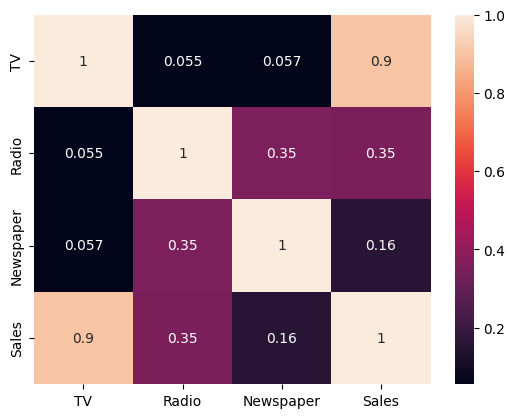

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=20240415)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


In [20]:
lr_model = LinearRegression()
lr_model.fit(X=X_train, y=Y_train)

LinearRegression()

In [21]:
print(f'R^2 score: {r2_score(y_true=Y_test, y_pred=lr_model.predict(X_test))}')

R^2 score: 0.8899911351140432


In [22]:
print(f'MAPE score: {mean_absolute_percentage_error(y_true=Y_test, y_pred=lr_model.predict(X_test))}')

MAPE score: 0.10483917290642844


In [23]:
import statsmodels

In [24]:
# added constant to get intercept 
# intercept is a sales volume if we do not use any advertising
ols = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

In [25]:
ols.params

array([ 4.4943138 ,  0.05548576,  0.11223769, -0.00598904])

In [26]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     492.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.49e-79
Time:                        12:03:06   Log-Likelihood:                -304.74
No. Observations:                 160   AIC:                             617.5
Df Residuals:                     156   BIC:                             629.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4943      0.349     12.875      0.000       3.805       5.184
x1             0.0555      0.002     36.062      0.000       0.052       0.059
x2             0.1122      0.009     12.119      0.000       0.094       0.131
x3            -0.0060      0.007     -0.908      0.365      -0.019       0.007
==============================================================================
Omnibus:                       21.640   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.033
Skew:                          -0.587   Prob(JB):                     1.01e-10
Kurtosis:                       5.351   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
r2_score(Y_test, ols.predict(sm.add_constant(X_test)))

0.8899911351140432

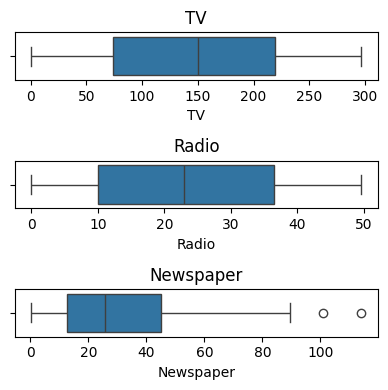

In [28]:
fig, axs = plt.subplots(3,1,figsize=(4,4))

axs[0].set_title('TV')
sns.boxplot(df['TV'], orient="h", ax=axs[0])
axs[1].set_title('Radio')
sns.boxplot(df['Radio'], orient="h", ax=axs[1])
axs[2].set_title('Newspaper')
sns.boxplot(df['Newspaper'], orient="h", ax=axs[2])

plt.tight_layout()

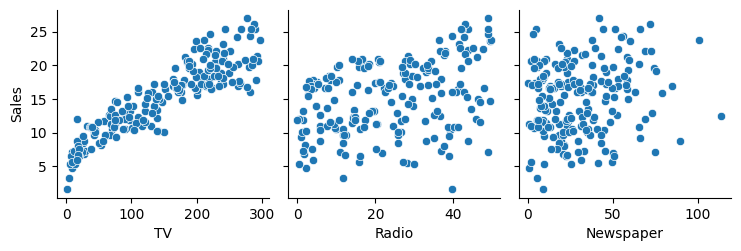

In [29]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

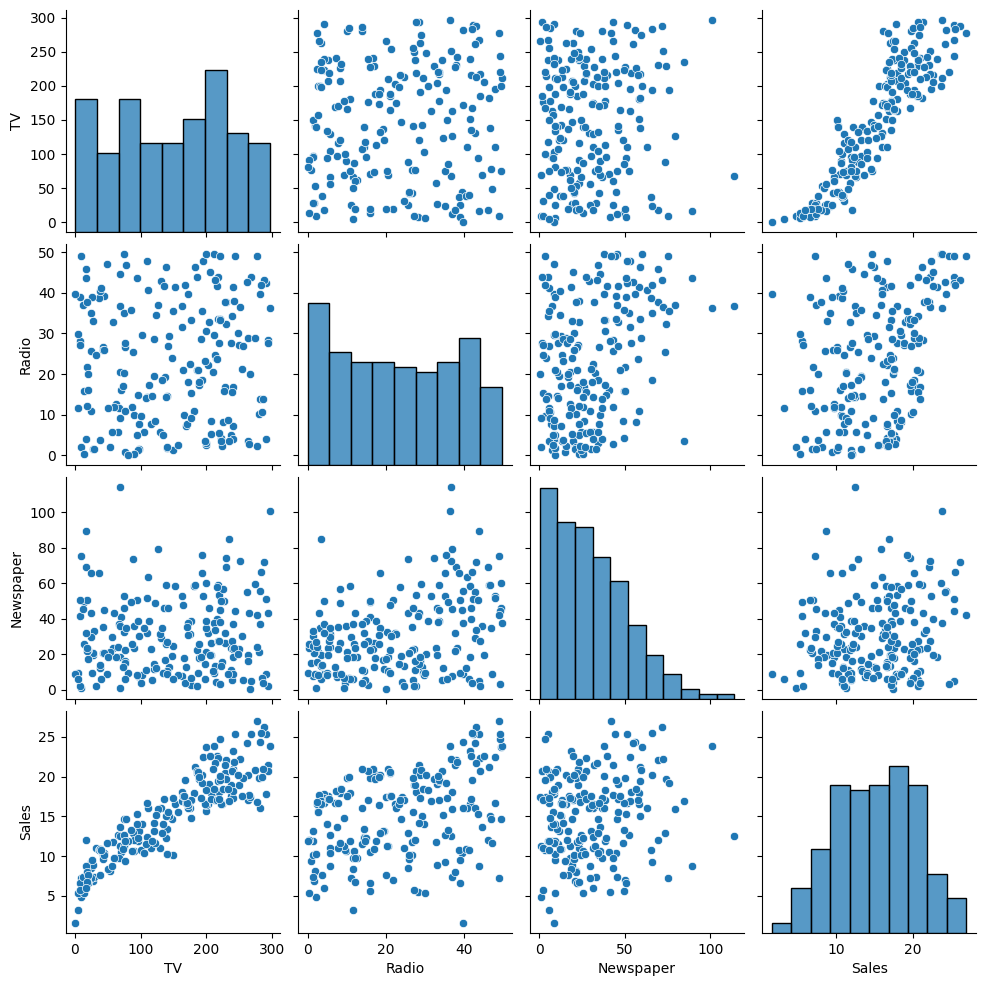

In [69]:
sns.pairplot(df)

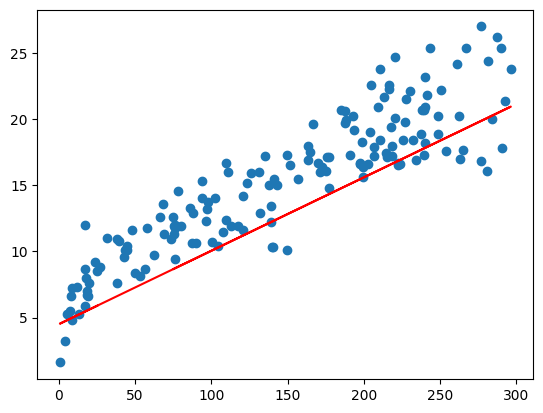

In [33]:
plt.scatter(X_train[:,0], Y_train)
plt.plot(X_train[:, 0], ols.params[0]+ols.params[1]*X_train[:,0], color='r')

Handling outlayers

In [38]:
df_clean = df[df['Newspaper']<90]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


In [41]:
X_clean = df_clean[['TV', 'Radio', 'Newspaper']].values
y_clean = df_clean['Sales'].values

In [42]:
X_clean_train, X_clean_test, Y_clean_train, Y_clean_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=20240415)

print(X_clean_train.shape, Y_clean_train.shape)
print(X_clean_test.shape, Y_clean_test.shape)

(158, 3) (158,)
(40, 3) (40,)


In [43]:
ols_clean = sm.OLS(Y_clean_train, sm.add_constant(X_clean_train)).fit()

In [44]:
ols_clean.params

array([4.53620355, 0.05374891, 0.10932531, 0.00654061])

In [45]:
ols_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     440.2
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.66e-75
Time:                        15:21:59   Log-Likelihood:                -303.78
No. Observations:                 158   AIC:                             615.6
Df Residuals:                     154   BIC:                             627.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5362      0.355     12.774      0.000       3.835       5.238
x1             0.0537      0.002     33.230      0.000       0.051       0.057
x2             0.1093      0.010     11.464      0.000       0.090       0.128
x3             0.0065      0.007      0.922      0.358      -0.007       0.021
==============================================================================
Omnibus:                       19.315   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.931
Skew:                          -0.533   Prob(JB):                     2.13e-09
Kurtosis:                       5.221   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

чтобы линейная регрессия хорошо работала величина ошибок предсказания распределена нормально

гетероскедантичность (heteroscedasticity)

гомоскедантичность () - вариация должна сохраняться со временем 

In [46]:
errors = ols.predict(sm.add_constant(X_train)) - Y_train

(array([ 2.,  3.,  4.,  2.,  4.,  6.,  4., 13., 15., 24., 16., 17., 17.,
         2., 10.,  5.,  7.,  4.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.]),
 array([-3.93203378, -3.55677726, -3.18152075, -2.80626423, -2.43100772,
        -2.05575121, -1.68049469, -1.30523818, -0.92998166, -0.55472515,
        -0.17946864,  0.19578788,  0.57104439,  0.94630091,  1.32155742,
         1.69681393,  2.07207045,  2.44732696,  2.82258347,  3.19783999,
         3.5730965 ,  3.94835302,  4.32360953,  4.69886604,  5.07412256,
         5.44937907,  5.82463559,  6.1998921 ,  6.57514861,  6.95040513,
         7.32566164]),
 <BarContainer object of 30 artists>)

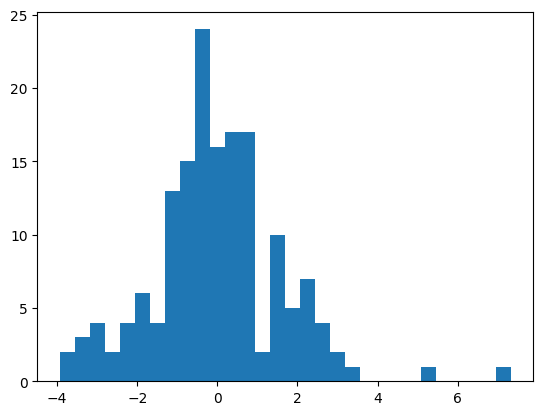

In [47]:
plt.hist(errors, bins=30)

/var/folders/xx/x_6wt9hs2vq2twldfgptb5840000gn/T/ipykernel_2423/934972166.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, bins=20)


<Axes: ylabel='Density'>

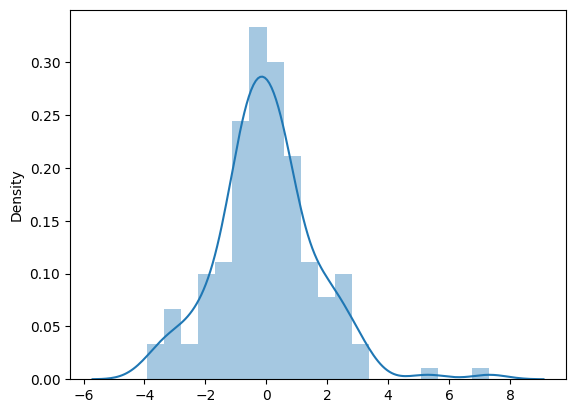

In [55]:
sns.displot(errors, bins=20)

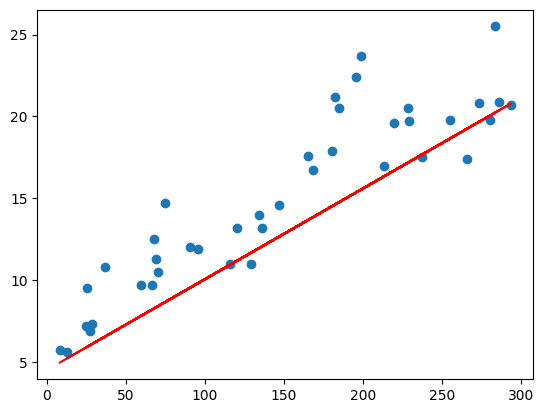

In [59]:
plt.scatter(X_test[:, 0], Y_test)
plt.plot(X_test[:,0], ols.params[0] + ols.params[1]*X_test[:,0], color='r')

1D REGRESSION

In [60]:
X_1d = df['TV'].values
y_1d = df['Sales'].values

In [65]:
X_1d_train, X_1d_test, Y_1d_train, Y_1d_test = train_test_split(X_1d, y_1d, test_size=0.2, random_state=20240415)

print(X_1d_train.shape, Y_1d_train.shape)
print(X_1d_test.shape, Y_1d_test.shape)

(160,) (160,)
(40,) (40,)


In [66]:
ols_1d = sm.OLS(Y_1d_train, sm.add_constant(X_1d_train)).fit()

In [67]:
ols_1d.params

array([6.96411087, 0.05570686])

In [68]:
ols_1d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     667.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.27e-58
Time:                        15:35:52   Log-Likelihood:                -360.37
No. Observations:                 160   AIC:                             724.7
Df Residuals:                     158   BIC:                             730.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9641      0.366     19.029      0.000       6.241       7.687
x1             0.0557      0.002     25.843      0.000       0.051       0.060
==============================================================================
Omnibus:                        1.039   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.982
Skew:                          -0.190   Prob(JB):                        0.612
Kurtosis:                       2.944   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
def calc_1d_reg(feature_column: str, df: pd.DataFrame):
    X = df[feature_column].values
    y = df['Sales'].values

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=20240415)

    return sm.OLS(Y_train, sm.add_constant(X_train)).fit()

In [71]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [72]:
tv_reg = calc_1d_reg('TV', df)
radio_reg = calc_1d_reg('Radio', df)
newspaper_reg = calc_1d_reg('Newspaper', df)

In [73]:
tv_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     667.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.27e-58
Time:                        15:41:01   Log-Likelihood:                -360.37
No. Observations:                 160   AIC:                             724.7
Df Residuals:                     158   BIC:                             730.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9641      0.366     19.029      0.000       6.241       7.687
x1             0.0557      0.002     25.843      0.000       0.051       0.060
==============================================================================
Omnibus:                        1.039   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.982
Skew:                          -0.190   Prob(JB):                        0.612
Kurtosis:                       2.944   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
radio_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     18.67
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.74e-05
Time:                        15:41:09   Log-Likelihood:                -483.75
No. Observations:                 160   AIC:                             971.5
Df Residuals:                     158   BIC:                             977.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3969      0.751     16.510      0.000      10.914      13.880
x1             0.1153      0.027      4.321      0.000       0.063       0.168
==============================================================================
Omnibus:                        7.615   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.834
Skew:                          -0.434   Prob(JB):                       0.0328
Kurtosis:                       2.480   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
newspaper_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.092
Date:                Mon, 15 Apr 2024   Prob (F-statistic):             0.0448
Time:                        15:41:15   Log-Likelihood:                -490.63
No. Observations:                 160   AIC:                             985.3
Df Residuals:                     158   BIC:                             991.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9411      0.728     19.147      0.000      12.503      15.379
x1             0.0400      0.020      2.023      0.045       0.001       0.079
==============================================================================
Omnibus:                        4.361   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                2.705
Skew:                          -0.103   Prob(JB):                        0.259
Kurtosis:                       2.397   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Permutation Importance

permutation importance - важность фичей - вносится шум в фичи и <br>
если реакция на малый шем сильная - то это важная фича


In [76]:
from sklearn.inspection import permutation_importance

In [77]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
r = permutation_importance(lr_model, X_train, Y_train, n_repeats=100, random_state=20240415)

In [79]:
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [86]:
print(f'permutation mean: {r.importances_mean}', f'permutation std: {r.importances_std}', sep='\n')

permutation mean: [1.58959629e+00 2.00865156e-01 1.26641223e-03]
permutation std: [0.13834314 0.02358603 0.00109262]


<Axes: >

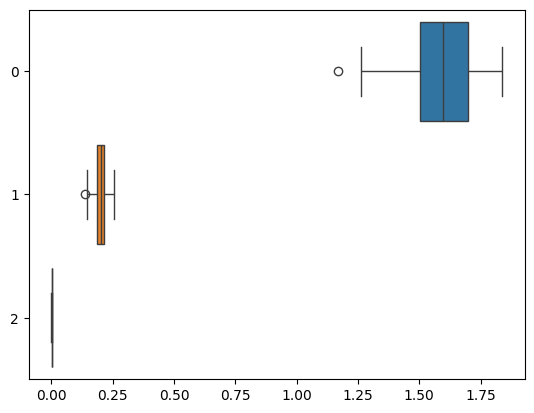

In [93]:
sns.boxplot(data = r.importances.T, orient='h')

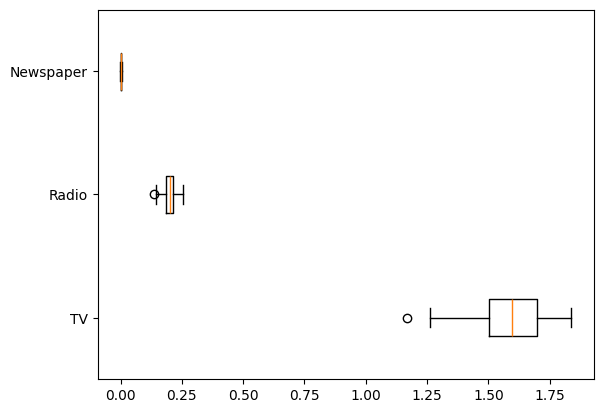

In [94]:
plt.boxplot(r.importances.T, vert=False, labels=df.columns[:-1])
plt.show()

"""
самый правый - самый важный, самый левый - самый менее важный
"""

In [95]:
ix = np.argsort(r.importances_mean)

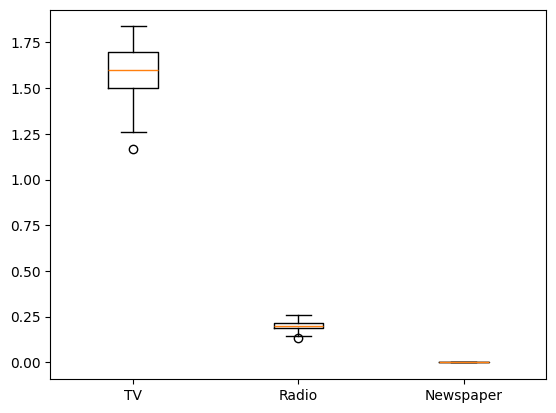

In [99]:
plt.boxplot(r.importances[ix].T, labels=df.columns[ix])
plt.show()

## columns transformation

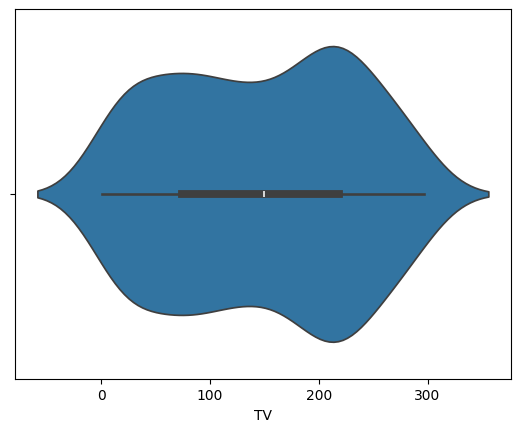

In [102]:
sns.violinplot(df['TV'], orient='h')
plt.show()

# shows destribution law

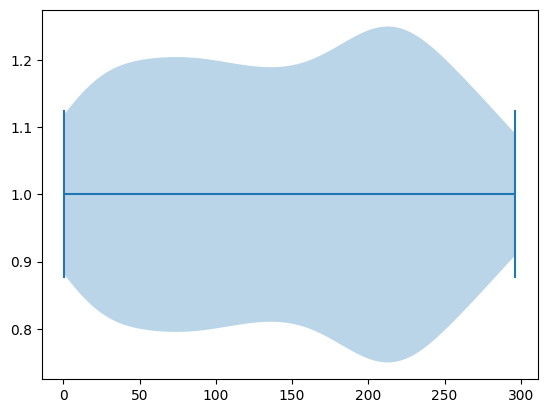

In [107]:
plt.violinplot(df['TV'], vert=False)
plt.show()

Видим, что данные распределены вокруг некоторых точек скоплений

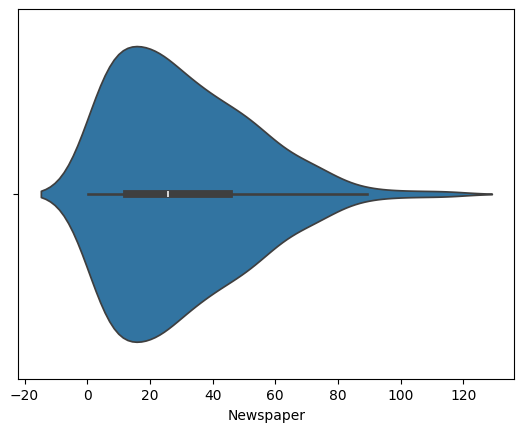

In [109]:
sns.violinplot(df['Newspaper'], orient='h')
plt.show()

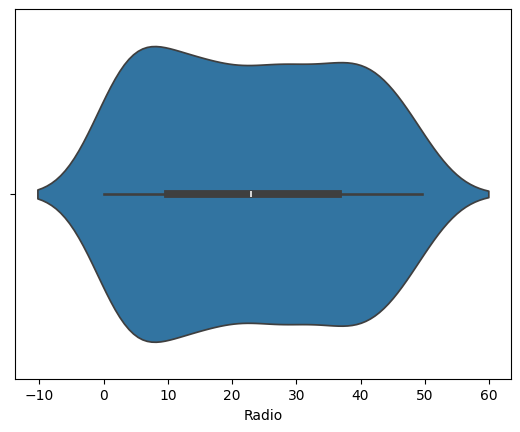

In [110]:
sns.violinplot(df['Radio'], orient='h')
plt.show()

## scaling data

In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [112]:
min_max_scaler = MinMaxScaler()
# fit scaler on train data, cause test data might be passed through scaling into training
train_X_min_max = min_max_scaler.fit_transform(X_train)
# makes it range from 0 to 1: `(x - min(x))/(max(x) - min(x))`

<Axes: >

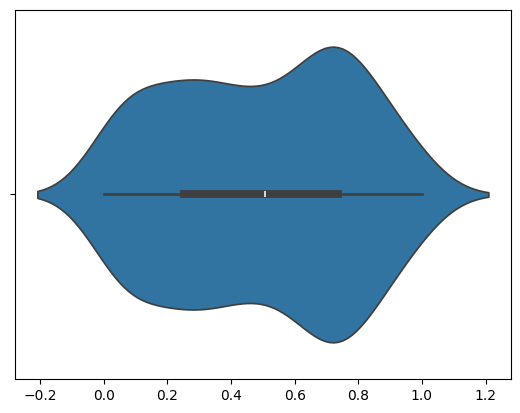

In [113]:
sns.violinplot(train_X_min_max[:, 0], orient='h')

<Axes: >

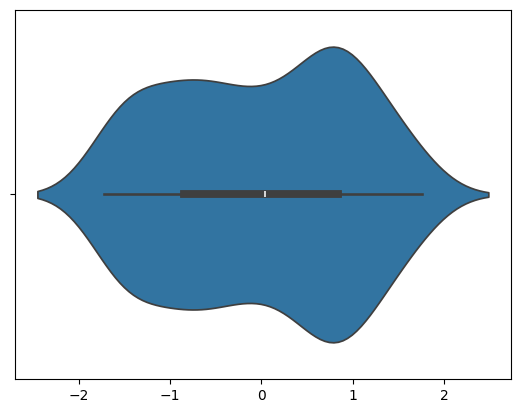

In [115]:
standart_scaler = StandardScaler()
train_x_standartized = standart_scaler.fit_transform(X_train)

sns.violinplot(train_x_standartized[:,0], orient='h')

<Axes: >

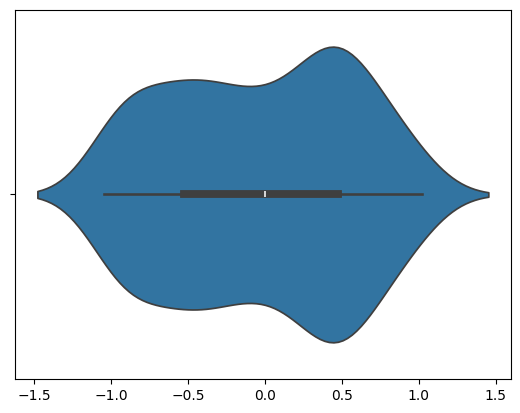

In [118]:
robust_scaler = RobustScaler()
train_x_robust = robust_scaler.fit_transform(X_train)

sns.violinplot(train_x_robust[:,0], orient='h')

/Users/hubievkasym/Desktop/Python Projects/SberProject/venv/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (160). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: >

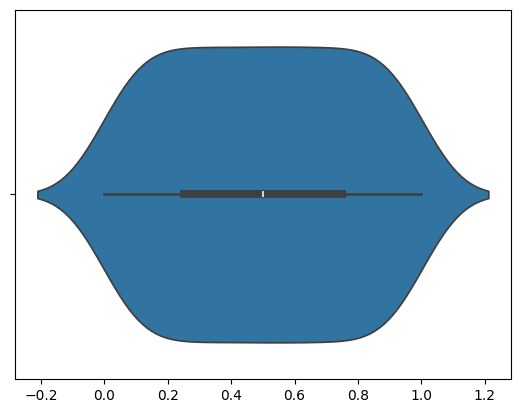

In [121]:
quantile_scaler = QuantileTransformer()
train_x_quantiled = quantile_scaler.fit_transform(X_train)

sns.violinplot(train_x_quantiled[:,0], orient='h')

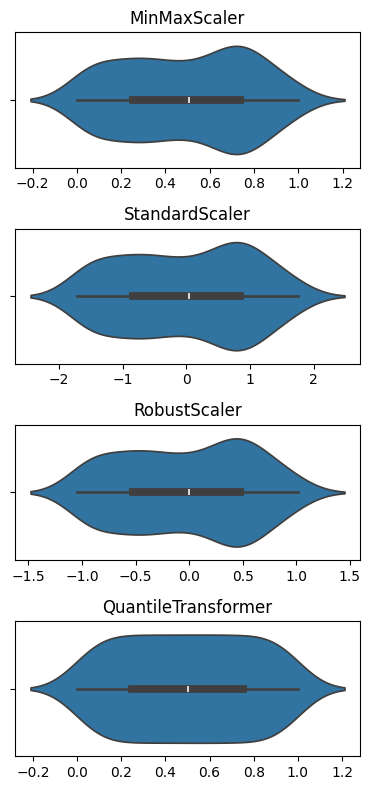

In [122]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(4,8))

axs[0].set_title('MinMaxScaler')
sns.violinplot(train_X_min_max[:, 0], orient='h', ax=axs[0])

axs[1].set_title('StandardScaler')
sns.violinplot(train_x_standartized[:, 0], orient='h', ax=axs[1])

axs[2].set_title('RobustScaler')
sns.violinplot(train_x_robust[:, 0], orient='h', ax=axs[2])

axs[3].set_title('QuantileTransformer')
sns.violinplot(train_x_quantiled[:,0], orient='h', ax=axs[3])

plt.tight_layout()

In [123]:
ols_transformer = sm.OLS(Y_train, sm.add_constant(train_x_quantiled)).fit()

In [124]:
ols_transformer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.8
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.44e-76
Time:                        16:32:38   Log-Likelihood:                -311.80
No. Observations:                 160   AIC:                             631.6
Df Residuals:                     156   BIC:                             643.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4751      0.386     11.593      0.000       3.713       5.238
x1            16.0762      0.470     34.188      0.000      15.147      17.005
x2             5.7971      0.489     11.858      0.000       4.831       6.763
x3            -0.5092      0.491     -1.037      0.301      -1.479       0.460
==============================================================================
Omnibus:                       15.791   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.280
Skew:                          -0.418   Prob(JB):                     9.78e-08
Kurtosis:                       5.035   Cond. No.                         5.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
ols_robust = sm.OLS(Y_train, sm.add_constant(train_x_robust)).fit()

In [126]:
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     492.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.49e-79
Time:                        16:33:15   Log-Likelihood:                -304.74
No. Observations:                 160   AIC:                             617.5
Df Residuals:                     156   BIC:                             629.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5082      0.134    115.418      0.000      15.243      15.774
x1             7.9331      0.220     36.062      0.000       7.499       8.368
x2             2.9715      0.245     12.119      0.000       2.487       3.456
x3            -0.1840      0.203     -0.908      0.365      -0.584       0.216
==============================================================================
Omnibus:                       21.640   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.033
Skew:                          -0.587   Prob(JB):                     1.01e-10
Kurtosis:                       5.351   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
test_X_robusted = robust_scaler.transform(X_test)
r2_score(Y_test, ols_robust.predict(sm.add_constant(test_X_robusted)))

0.889991135114043